In [7]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


# Monthly Soil moisture (mm3/mm3) of California from 2017-2018 (24 months)

In [8]:
soil_moisture = []
for month in range(1, 10):
    f = nc.Dataset("../Data/2017_sm/ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-20170"+str(month)+"01000000-fv04.5.nc")
    all_vars = f.variables.keys()   # get all keys
    all_vars_info = f.variables.items()   # output: <class 'dict_items'>
    sm = f['sm'][:].data
    soil_moisture.append(sm[0][193][249])
for month in range(10, 13):
    f = nc.Dataset("../Data/2017_sm/ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-2017"+str(month)+"01000000-fv04.5.nc")
    all_vars = f.variables.keys()   # get all keys
    all_vars_info = f.variables.items()   # output: <class 'dict_items'>
    sm = f['sm'][:].data
    soil_moisture.append(sm[0][193][249])
for month in range(1, 10):
    f = nc.Dataset("../Data/2018_sm/ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-20180"+str(month)+"01000000-fv04.5.nc")
    all_vars = f.variables.keys()   # get all keys
    all_vars_info = f.variables.items()   # output: <class 'dict_items'>
    sm = f['sm'][:].data
    processed_data = 0
    if(sm[0][193][249] == -9999.):
        _ = 0
        for j in range (-15, 15):
            if(sm[0][193][249+j] != -9999.):
                if(_ == 0):
                    _ = sm[0][193][249+j]
                else:
                    _ = (sm[0][193][249+j] + _)/2
        processed_data = _
    if(sm[0][193][249] != -9999.):
        soil_moisture.append(sm[0][193][249])
    else:
        soil_moisture.append(processed_data)
for month in range(10, 13):
    f = nc.Dataset("../Data/2018_sm/ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-2018"+str(month)+"01000000-fv04.5.nc")
    all_vars = f.variables.keys()   # get all keys
    all_vars_info = f.variables.items()   # output: <class 'dict_items'>
    sm = f['sm'][:].data
    processed_data = 0
    if(sm[0][193][249] == -9999.):
        _ = 0
        for j in range (-15, 15):
            if(sm[0][193][249+j] != -9999.):
                if(_ == 0):
                    _ = sm[0][193][249+j]
                else:
                    _ = (sm[0][193][249+j] + _)/2
        processed_data = _
    if(sm[0][193][249] != -9999.):
        soil_moisture.append(sm[0][193][249])
    else:
        soil_moisture.append(processed_data)
for index, data in enumerate(soil_moisture):
    if(data == 0):
        data = (soil_moisture[index-1] + soil_moisture[index+1])/2
        soil_moisture[index] = data


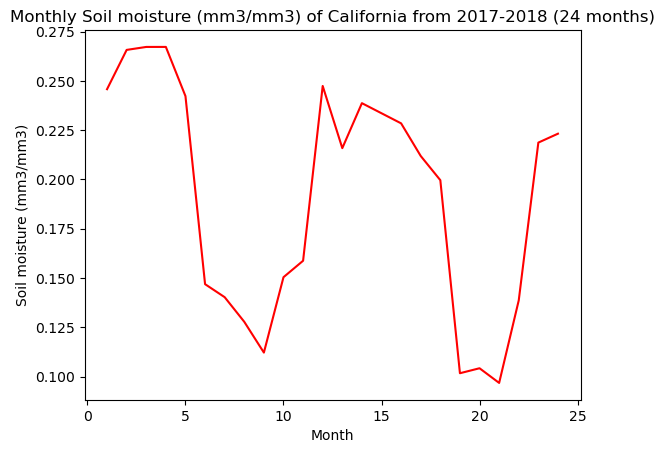

In [9]:
import matplotlib.pyplot as plt
month = np.arange(1, 25, 1)
plt.title("Monthly Soil moisture (mm3/mm3) of California from 2017-2018 (24 months)")
plt.xlabel("Month")
plt.ylabel("Soil moisture (mm3/mm3)")
plt.plot(month, soil_moisture, 'r')

In [10]:
air_pressure_california = pd.DataFrame(pd.read_csv("../Data/California_data/AirPressure.csv"))
air_pressure_list = air_pressure_california.values[0].tolist() + air_pressure_california.values[1].tolist()
rainfall_california = pd.DataFrame(pd.read_csv("../Data/California_data/ObservedRainfall.csv"))
rainfall_list = rainfall_california.values[0].tolist() + rainfall_california.values[1].tolist()
temperature_california = pd.DataFrame(pd.read_csv("../Data/California_data/Temperature.csv"))
temperature_list = temperature_california.values[0].tolist() + temperature_california.values[1].tolist()


C:\Users\Sycamore\AppData\Local\Temp\ipykernel_22028\2958381667.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(month, air_pressure_list, 'r', marker='.', c='r', ms=5, linewidth='1', label="Air pressure")
C:\Users\Sycamore\AppData\Local\Temp\ipykernel_22028\2958381667.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(month, temperature_list, "r", marker='.', c='g', ms=5, linewidth='1', label="Temperature")


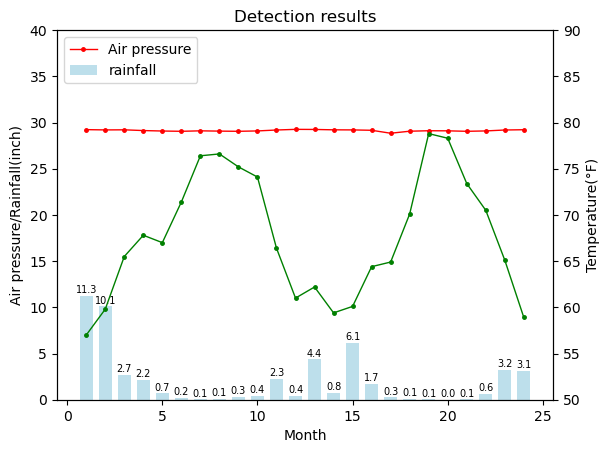

In [18]:
# 绘柱状图
plt.plot(month, air_pressure_list, 'r', marker='.', c='r', ms=5, linewidth='1', label="Air pressure")
plt.bar(x=month, height=rainfall_list, label='rainfall', color='lightblue', alpha=0.8, width=0.7)
for xx, yy in zip(month, rainfall_list):
    plt.text(xx, yy+0.1, str(round(yy, 1)), ha='center', va='bottom', fontsize=7)
plt.ylim(0, 40)
# 在左侧显示图例
plt.legend(loc="upper left")
# 设置标题
plt.title("Detection results")
# 为两条坐标轴设置名称
plt.xlabel("Month")
plt.ylabel("Air pressure/Rainfall(inch)")

# 画折线图
ax2 = plt.twinx()
ax2.set_ylabel("Temperature(°F)")
ax2.set_ylim(50, 90)
# 设置坐标轴范围
plt.plot(month, temperature_list, "r", marker='.', c='g', ms=5, linewidth='1', label="Temperature")
# 显示数字

plt.show()
 